<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/ipl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline 

In [94]:
matches_data=pd.read_csv("/content/IPL_Matches_2008-2020[1].csv")

matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [95]:
deliveries_data=pd.read_csv("/content/IPL_Ball-by-Ball_2008-2020[1].csv")

In [96]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [97]:
matches_data['season'] = matches_data['date'].str[:4].astype(int)

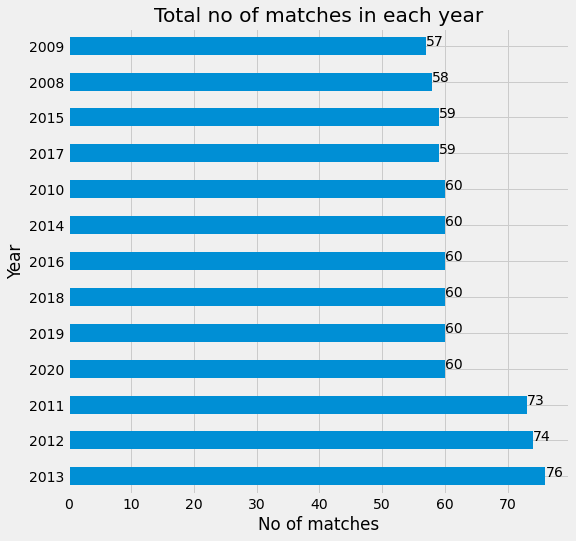

In [98]:
plt.style.use("fivethirtyeight")
matches_data["season"].value_counts().plot(kind="barh",figsize=(8,8))
for index, value in enumerate(matches_data["season"].value_counts()):
    plt.text(value, index,
             str(value))
plt.title("Total no of matches in each year")
plt.xlabel("No of matches")
plt.ylabel("Year")
plt.show()

## We see a number of matches is increased in the year between 2011 to 2013 because of addition of two teams KTK and PW.

## But KTK was removed in the next season and PW was removed in 2013 bringing back to 8 from 2014 onwards.

In [99]:
matches_data["winner"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [100]:
team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals']

Team=["KKR","CSK","DC","RCB","RR","KXIP","SRH","MI","PW","KTK","SRH","RPS","GL","RPS","DC"]
matches_data.replace(team,Team,inplace=True)

In [101]:
matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [102]:
matches_played=pd.concat([matches_data['team1'],matches_data['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=["team","Total matches"]
matches_played

,team,Total matches
0,MI,203
1,SRH,199
2,RCB,195
3,DC,194
4,KKR,192
5,KXIP,190
6,CSK,178
7,RR,161
8,PW,46
9,RPS,30


In [103]:
win_matches=pd.DataFrame(matches_data["winner"].value_counts())
win_matches.columns=["matches won"]
win_matches["team"]=win_matches.index
win_matches.reset_index(drop=True,inplace=True)
win_matches

,matches won,team
0,120,MI
1,106,CSK
2,99,KKR
3,95,SRH
4,91,RCB
5,88,KXIP
6,86,DC
7,81,RR
8,15,RPS
9,13,GL


In [104]:
matches_played=pd.merge(matches_played,win_matches,on="team")

In [105]:
matches_played

,team,Total matches,matches won
0,MI,203,120
1,SRH,199,95
2,RCB,195,91
3,DC,194,86
4,KKR,192,99
5,KXIP,190,88
6,CSK,178,106
7,RR,161,81
8,PW,46,12
9,RPS,30,15


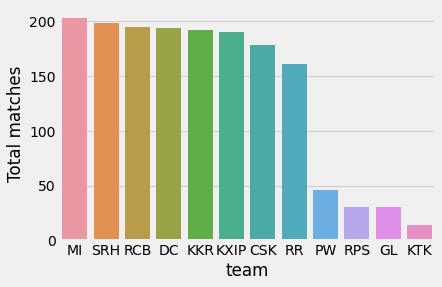

In [106]:
sns.barplot(x=matches_played["team"],y=matches_played["Total matches"])
#MI has played most matches 



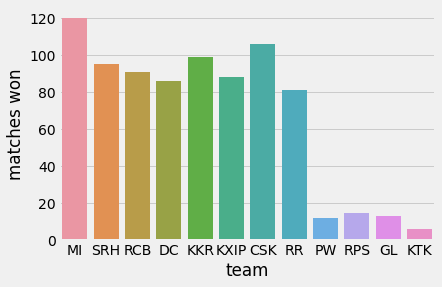

In [107]:
sns.barplot(x=matches_played["team"],y=matches_played["matches won"])
#MI has the highest number of matches won followed by CSK


In [108]:
x=matches_data.player_of_match.value_counts().head(10)

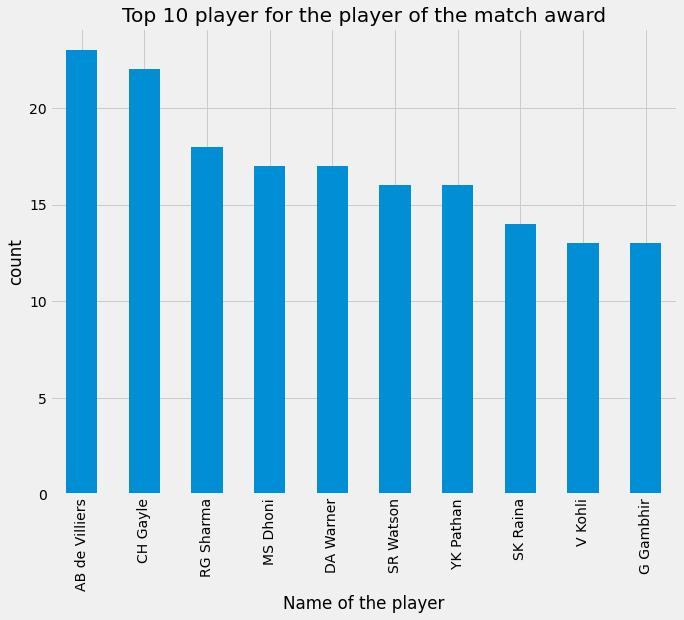

In [109]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
x.plot(kind="bar")
plt.xlabel("Name of the player")
plt.ylabel("count")
plt.title("Top 10 player for the player of the match award")
plt.show()



In [110]:
toss=matches_data.groupby("season").toss_decision.value_counts()
toss.unstack()
##unstack() method helps us to convert the values of toss decision into  seperate columns

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


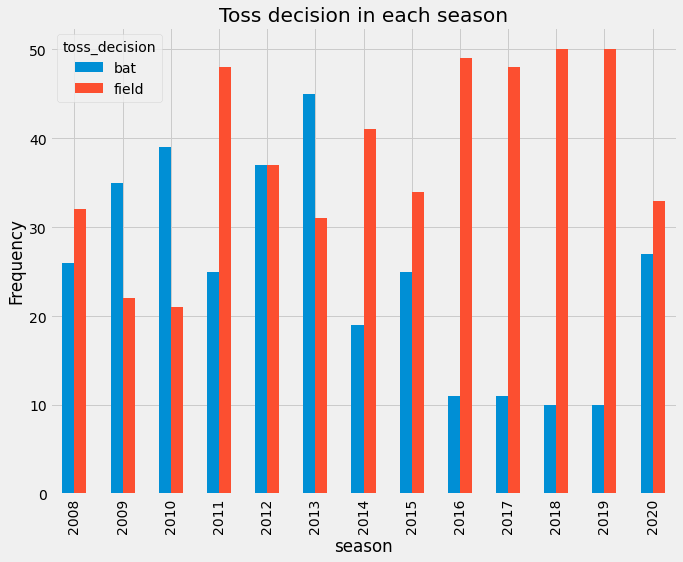

In [111]:
toss.unstack().plot(kind="bar",ylabel="Frequency",title="Toss decision in each season",figsize=(10,8))
plt.show()

In [112]:
toss_decision_by_each_team=matches_data.groupby("toss_winner").toss_decision.value_counts()

In [113]:
toss_decision_by_each_team.unstack()

toss_decision,bat,field
toss_winner,,
CSK,51,46
DC,36,64
GL,1,14
KKR,34,64
KTK,3,5
KXIP,27,58
MI,48,58
PW,11,9
RCB,24,63


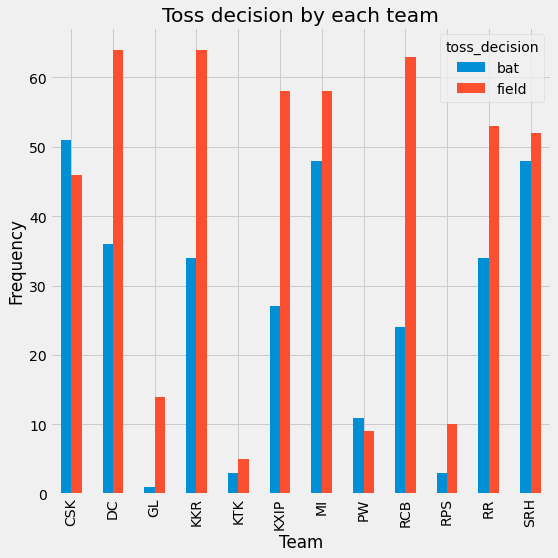

In [114]:
toss_decision_by_each_team.unstack().plot(kind="bar",xlabel="Team",ylabel="Frequency",title="Toss decision by each team",figsize=(8,8))
plt.show()

In [115]:
matches_data.groupby("venue").toss_decision.value_counts().unstack()

toss_decision,bat,field
venue,,
Barabati Stadium,2.0,5.0
Brabourne Stadium,6.0,5.0
Buffalo Park,3.0,NaN
De Beers Diamond Oval,2.0,1.0
Dr DY Patil Sports Academy,7.0,10.0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,5.0,8.0
Dubai International Cricket Stadium,15.0,18.0
Eden Gardens,28.0,49.0
Feroz Shah Kotla,32.0,42.0


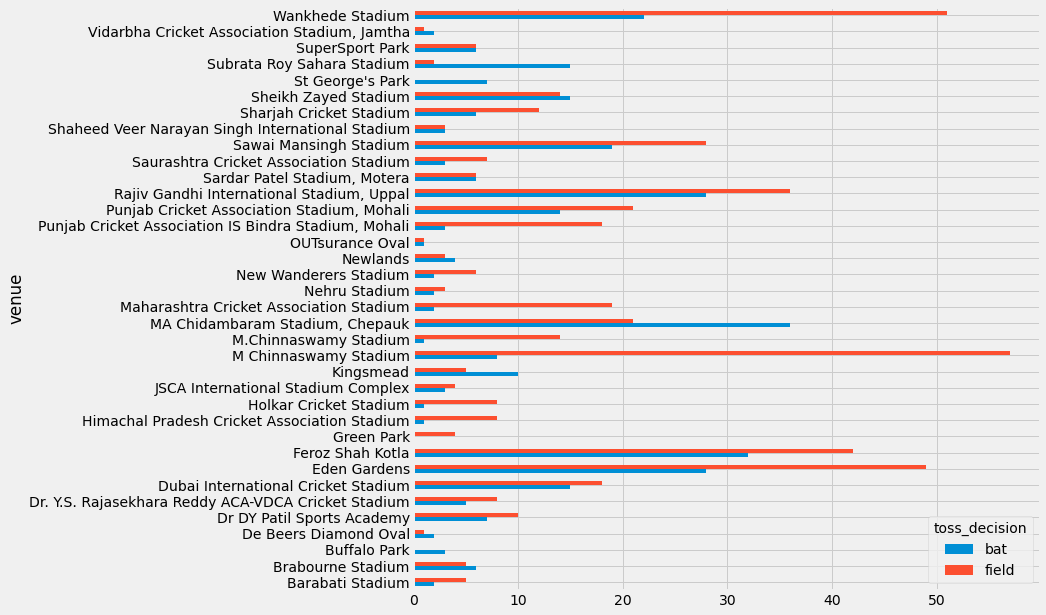

In [116]:
matches_data.groupby("venue").toss_decision.value_counts().unstack().plot(kind="barh",figsize=(10,10))
plt.show()

In [117]:
matches_played

,team,Total matches,matches won
0,MI,203,120
1,SRH,199,95
2,RCB,195,91
3,DC,194,86
4,KKR,192,99
5,KXIP,190,88
6,CSK,178,106
7,RR,161,81
8,PW,46,12
9,RPS,30,15


In [118]:
matches_played["win percentage"]=(matches_played["matches won"]/matches_played["Total matches"])*100

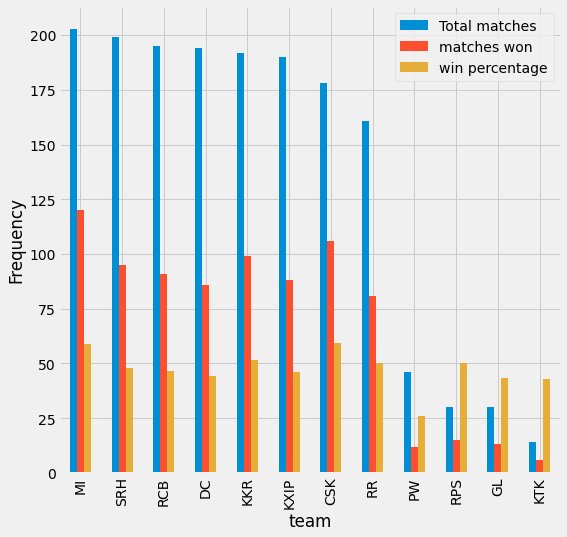

In [119]:
matches_played.plot(x="team",kind="bar",figsize=(8,8),ylabel="Frequency")
plt.show()

In [120]:
matches_played

,team,Total matches,matches won,win percentage
0,MI,203,120,59.113300
1,SRH,199,95,47.738693
2,RCB,195,91,46.666667
3,DC,194,86,44.329897
4,KKR,192,99,51.562500
5,KXIP,190,88,46.315789
6,CSK,178,106,59.550562
7,RR,161,81,50.310559
8,PW,46,12,26.086957
9,RPS,30,15,50.000000


# Lets find out which team has won highest number of ipl trophies.

In [121]:
ipl_win=matches_data.groupby("season").tail(1).sort_values("season",ascending=False)

In [122]:
ipl_winners=ipl_win.winner.value_counts()

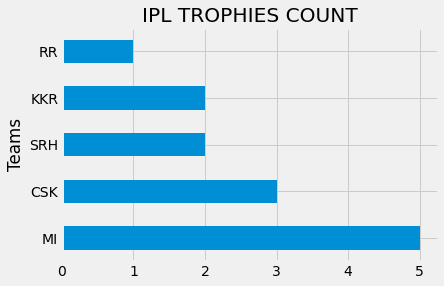

In [123]:
ipl_winners.plot(kind="barh",xlabel="Teams",title="IPL TROPHIES COUNT")
plt.show()

### CSK and MI have won the IPL atleast 3 times.

# Lets find out the most consistent across all seasons

In [124]:
matches_won_each_season=pd.crosstab(matches_data["winner"],matches_data["season"])

In [125]:
matches_won_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
winner,,,,,,,,,,,,,
CSK,9,8,9,11,10,12,10,10,0,0,11,10,6
DC,7,10,7,4,11,3,2,5,7,6,5,10,9
GL,0,0,0,0,0,0,0,0,9,4,0,0,0
KKR,6,3,7,8,12,6,11,7,8,9,9,6,7
KTK,0,0,0,6,0,0,0,0,0,0,0,0,0
KXIP,10,7,4,7,8,8,12,3,4,7,6,6,6
MI,7,5,11,10,10,13,7,10,7,12,6,11,11
PW,0,0,0,4,4,4,0,0,0,0,0,0,0
RCB,4,9,8,10,8,9,5,8,9,3,6,5,7


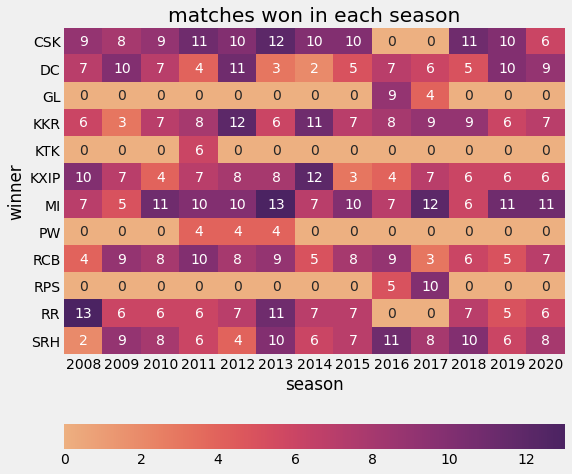

In [126]:
plt.figure(figsize=(8,8))
plt.title("matches won in each season")
sns.heatmap(matches_won_each_season,annot=True,cbar_kws={"orientation":"horizontal"},cmap="flare")

### CSK is the most consistent team in all seasons and  they won atleast 8 matches in all the seasons except the last one ,its an unforgettable season for the CSK players and for their fans as well.

In [127]:
MI_VS_CSK=matches_data[((matches_data.team1=="MI")&(matches_data.team2=="CSK")|(matches_data.team1=="CSK")&(matches_data.team2=="MI"))]

In [128]:
head_to_head=MI_VS_CSK.winner.value_counts()

In [129]:
head_to_head

MI     18
CSK    12
Name: winner, dtype: int64

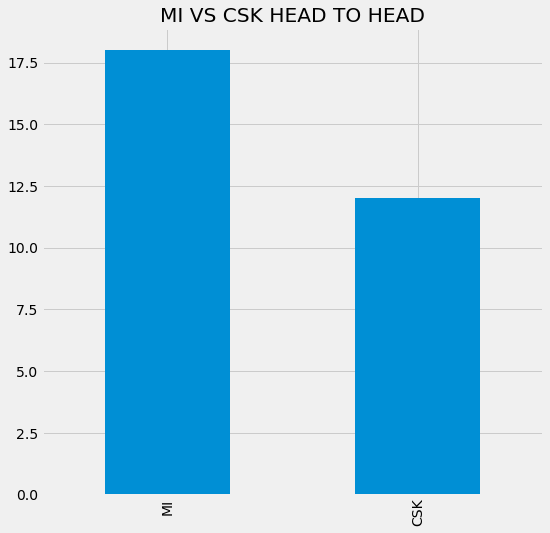

In [130]:
head_to_head.plot(kind="bar",figsize=(8,8),title="MI VS CSK HEAD TO HEAD")
plt.show()

### MI is dominating in the head to head with csk by winning 18 matches out of 30 that were played.

#Inferences from the analysis
  ##  We have drawn some interesting informations and now know more about the IPL than before. Here’s the summary of what we learned through the analysis.


## •	Almost 60 matches were played in every season of IPL but number of matches is high in the year 2011 to 2013 due to the addition of two new teams.
## •	MI have played the highest number of matches and it has also the highest win percentage followed by CSK.
## •	ABD has the highest number of player of the match award and he is from South Africa.
## •	Comparing the toss decision in all the season, most of the teams winning the toss chooses to field first.
## •	MI and CSK are the two teams that have won the  IPL atleast 3 times.
## •	CSK is the most consistent team in all the seasons.
## •	Comparing head to head of MI vs CSK  MI is dominating by winning 18 matches out of 30 that were played.

